# SOCAT analysis

:cat: :cat: :cat: :cat: :cat: :cat: 

     1. Explore the SOCATv2021_tracks_gridded_monthly.nc and recover major (time) trends in the SO
    2. Compare how T001 and M001 do against these obs. 


In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [6]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater

#import mapfxn as mf
#reload(mf)

plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

In [34]:
obsdir = '/gpfs/data/greenocean/software/resources/Observations/'
tdir = '/gpfs/home/mep22dku/scratch/'
tso = 'SOCATv2021_tracks_gridded_monthly.nc'

so = nc.Dataset(f'{tdir}{tso}')
print(so)

print(so['tmnth'][1])

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    history: FERRET V7.62  25-May-21
    Conventions: CF-1.6
    SOCAT_Notes: SOCAT gridded v2021 26-May-2021
    title: SOCAT gridded v2021 Monthly 1x1 degree gridded dataset
    summary: Surface Ocean Carbon Atlas (SOCAT) Gridded (binned) SOCAT observations, with a spatial 
grid of 1x1 degree and monthly in time. The gridded fields are computed using only SOCAT 
datasets with QC flags of A through D and SOCAT data points flagged with WOCE flag values of 2.
    references: http://www.socat.info/
    caution: NO INTERPOLATION WAS PERFORMED. SIGNIFICANT BIASES ARE PRESENT IN THESE GRIDDED RESULTS DUE TO THE 
ARBITRARY AND SPARSE LOCATIONS OF DATA VALUES IN BOTH SPACE AND TIME.
    dimensions(sizes): xlon(360), ylat(180), tmnth(612), bnds(2)
    variables(dimensions): float64 xlon(xlon), float64 ylat(ylat), float64 tmnth(tmnth), float64 tmnth_bnds(tmnth,bnds), int32 count_ncruise(tmnth,ylat,x

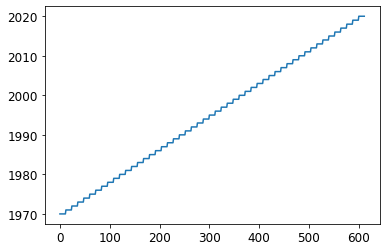

In [36]:
mons = np.zeros([51,12]); yrs = np.zeros([51,12])

for i in range(0,51):
    yrs[i,:] = 1970+i
    
for i in range(0,12):
    mons[:,i] = i+1

mons_r = mons.ravel()

yrs_r = yrs.ravel()
plt.plot(yrs_r)
# mns = pd.date_range('1970-01-01','2019-12-01', 
#               freq='MS').strftime("%Y-%b").tolist()

# print(np.shape(mns))

# print(mns[599])

# dat = np.zeros([600])
# dat[:] = np.random.randint(100)

# plt.plot(mns[0:10],dat[0:10])